In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D 

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
print('x_train Shape :', x_train.shape)
print('y_train Shape :', y_train.shape)

x_train Shape : (60000, 28, 28)
y_train Shape : (60000,)


2


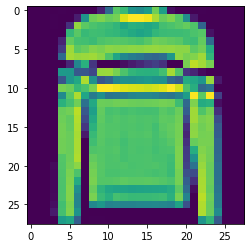

In [4]:
plt.imshow(x_train[5,:,:])
print(y_train[5])

In [5]:
x_train = x_train[:,:,:, np.newaxis]
x_test = x_test[:,:,:, np.newaxis]

print('x_train Shape: ', x_train.shape)
print('y_train Shape: ', y_train.shape)
print('Size of x_train: ', len(x_train))
print('Size of y_train: ', len(y_train))

x_train Shape:  (60000, 28, 28, 1)
y_train Shape:  (60000,)
Size of x_train:  60000
Size of y_train:  60000


In [6]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [9]:
input_shape= x_train[0].shape

In [10]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Conv2D(filters= 6 , kernel_size=(5,5), strides=(1,1),activation='tanh', input_shape=input_shape, padding='same'),
                             tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2),padding = 'valid'),
                             tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5),strides= (1,1),activation='tanh', padding='valid'),
                             tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(120, activation='relu'),
                             tf.keras.layers.Dense(84, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')

])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [24]:
import datetime
log_dir="C:\\tmp\\tf_logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Specify the callback object
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch= 100000000)

In [25]:
model.compile(optimizer='adam',loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y =y_train, epochs = 20, callbacks=[tensorboard_callback],validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 46s 765us/sample - loss: 0.5379 - accuracy: 0.8023 - val_loss: 0.4321 - val_accuracy: 0.8428
Epoch 2/20
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.3771 - accuracy: 0.8601 - val_loss: 0.3840 - val_accuracy: 0.8603
Epoch 3/20
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.3335 - accuracy: 0.8756 - val_loss: 0.3532 - val_accuracy: 0.8710
Epoch 4/20
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.3032 - accuracy: 0.8873 - val_loss: 0.3208 - val_accuracy: 0.8821
Epoch 5/20
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.2814 - accuracy: 0.8944 - val_loss: 0.3169 - val_accuracy: 0.8815
Epoch 6/20
60000/60000 [==============================] - 142s 2ms/sample - loss: 0.2639 - accuracy: 0.8998 - val_loss: 0.3019 - val_accuracy: 0.8880
Epoch 7/20
60000/60000 [===========================

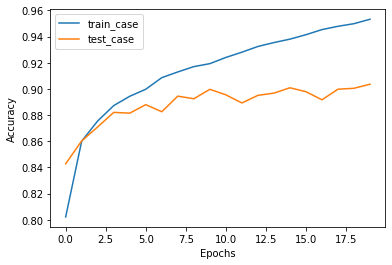

In [26]:
plt.plot(history.history['accuracy']),
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train_case','test_case'], loc='upper left')
plt.show()

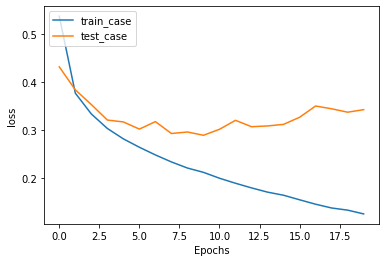

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_case','test_case'], loc = 'upper left')
plt.show()




tf.compat.v1.summary.scalar('accuracy',res)



In [28]:
import pandas as pd
from sklearn.metrics import confusion_matrix
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(model.predict(x_test)).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [29]:
confusion_matrix

array([[864,   0,  18,  21,   2,   1,  87,   0,   7,   0],
       [  1, 981,   0,  10,   3,   0,   4,   0,   1,   0],
       [ 19,   0, 844,  11,  63,   0,  60,   0,   3,   0],
       [ 16,  11,   9, 918,  23,   0,  20,   0,   3,   0],
       [  1,   1,  66,  37, 834,   0,  59,   0,   2,   0],
       [  1,   0,   0,   0,   0, 975,   0,  18,   0,   6],
       [130,   0,  55,  18,  67,   1, 716,   0,  13,   0],
       [  0,   0,   0,   0,   0,   8,   0, 966,   0,  26],
       [  6,   2,   2,   7,   4,   3,   0,   3, 971,   2],
       [  1,   0,   0,   0,   0,   5,   0,  27,   0, 967]], dtype=int64)

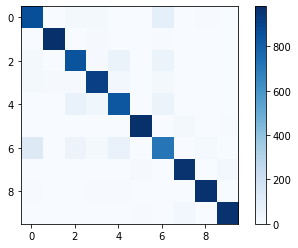

In [30]:
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title(title)
plt.colorbar()

In [32]:
from tensorboard.plugins.custom_scalar import layout_pb2

In [31]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [74]:
def plot_confusion_matrix(cm):
  


array([[848,   4,  17,  22,   5,   2,  95,   0,   7,   0],
       [  2, 973,   2,  15,   5,   0,   3,   0,   0,   0],
       [ 16,   2, 847,  10,  62,   0,  56,   1,   5,   1],
       [  9,  13,  11, 905,  27,   0,  31,   0,   3,   1],
       [  1,   1,  71,  33, 828,   0,  61,   0,   5,   0],
       [  0,   0,   2,   2,   0, 967,   0,  17,   1,  11],
       [108,   1,  82,  34,  64,   0, 699,   0,  12,   0],
       [  0,   0,   0,   0,   0,   6,   0, 961,   1,  32],
       [  5,   1,   3,   7,   1,   1,   6,   3, 973,   0],
       [  0,   0,   0,   0,   1,   3,   0,  26,   0, 970]])